In [30]:
!gdown 16BGa_iVQC7Y1tnwYPDCeT7CbSd6wk_8S

Downloading...
From: https://drive.google.com/uc?id=16BGa_iVQC7Y1tnwYPDCeT7CbSd6wk_8S
To: /content/breast cancer.csv
100% 125k/125k [00:00<00:00, 86.5MB/s]


First, we download the dataset from google drive using !gdown command.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats

We import some libraries that we need, like pandas for building the dataframe, matplotlib for plots, tensorflow for modeling, numpy for getting feature importances from random forest, and sklearn for spliting data and using random forest.

In [32]:
df = pd.read_csv('/content/breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Read the data and see what it looks like.

In [33]:
df.shape

(569, 33)

check the dimensions of data

the original data set had one blank column that pandas has named it "Unnamed: 32".
We delete this column.

In [34]:
del df['Unnamed: 32']
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We did some checking on data to see what data types are there and whether they have any null values.

In [36]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We can see some statistics on data above.

In [37]:
for col in df.columns:
    print(col, df[col].nunique())

id 569
diagnosis 2
radius_mean 456
texture_mean 479
perimeter_mean 522
area_mean 539
smoothness_mean 474
compactness_mean 537
concavity_mean 537
concave points_mean 542
symmetry_mean 432
fractal_dimension_mean 499
radius_se 540
texture_se 519
perimeter_se 533
area_se 528
smoothness_se 547
compactness_se 541
concavity_se 533
concave points_se 507
symmetry_se 498
fractal_dimension_se 545
radius_worst 457
texture_worst 511
perimeter_worst 514
area_worst 544
smoothness_worst 411
compactness_worst 529
concavity_worst 539
concave points_worst 492
symmetry_worst 500
fractal_dimension_worst 535


We check how many different values does each column have so that we can label the one column with "object" data type.

In [38]:
df = df.replace({"M":1,"B":0})

So we labeled the target column.

In [39]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
print(df.diagnosis.value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


Count the number of records for each class

#The Correlation plot

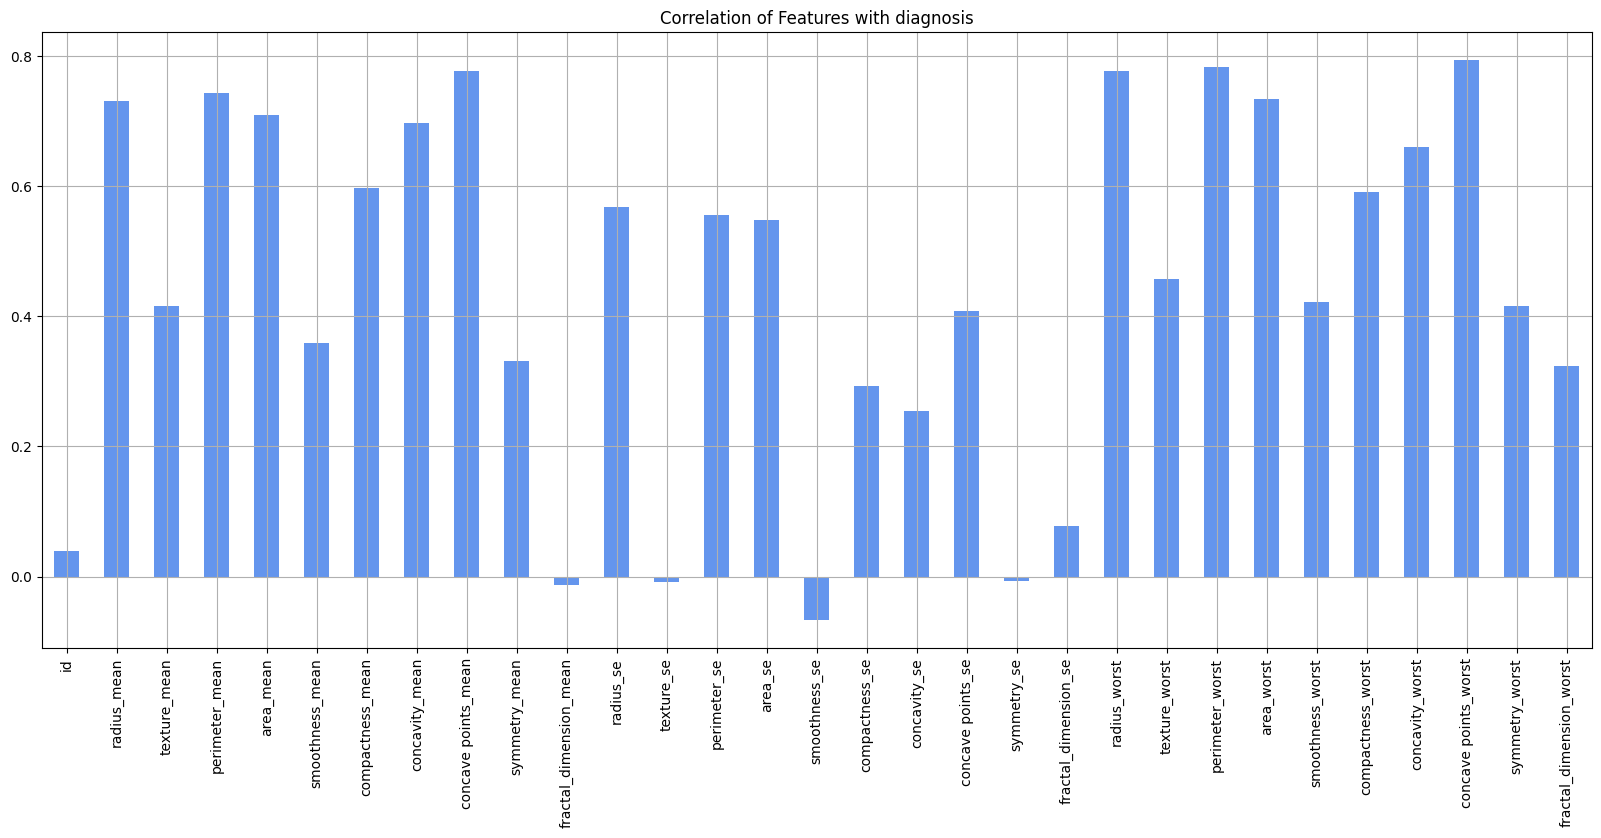

In [41]:
plt.figure(figsize=(20, 8))
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, title="Correlation of Features with diagnosis", color="cornflowerblue");

Here is the correlation between each of the columns and the diagnosis. according to this plot we can recognize which columns have low correlation with diagnosis like: id, fractal_dimension_mean, texture_se, smoothness_se, symmetry_se

#Random Forest Classifier



In [42]:
X = df.drop(['id', 'diagnosis'], axis=1)
Y = df['diagnosis']

# Standardize the feature data
#######scaler = StandardScaler()
########X = scaler.fit_transform(X)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##############print("Normalized Training Data:")
#############print(X_train[:5])

print("Normalized Training Data:")
print(pd.DataFrame(X_train).head())

Normalized Training Data:
         0         1         2         3         4         5         6   \
0  0.096928  0.257694  0.103656  0.045387  0.487226  0.373965  0.733365   
1  0.667755  0.570172  0.683505  0.495228  0.554934  0.809214  0.582709   
2  0.103744  0.140345  0.106489  0.049799  0.221901  0.208975  0.140300   
3  0.173648  0.524518  0.167369  0.086320  0.396678  0.162444  0.055740   
4  0.150930  0.174839  0.143459  0.071432  0.548614  0.187811  0.025398   

         7         8         9   ...        20        21        22        23  \
0  0.217445  0.530808  0.642376  ...  0.084667  0.283316  0.075153  0.034285   
1  0.743539  0.674242  0.505897  ...  0.667022  0.571962  0.627970  0.467902   
2  0.108350  0.646970  0.414280  ...  0.073995  0.192164  0.075601  0.030697   
3  0.080268  0.422727  0.280750  ...  0.153682  0.617537  0.137308  0.066482   
4  0.064115  0.850000  0.413648  ...  0.109925  0.144723  0.096867  0.045075   

         24        25        26        27 

  We seperate the features and the target columns so we can train a random
forest classifier on them, because id is not a relevant feature, we drop it too.

We also normalize the features using sklearn.preprocessing.MinMaxScaler. Because we use relu activation function in the MLP, we need the features to hold positive values.

At the end we split the data to train and test datasets using sklearn_model_selection. the random_state parameter can be None or any positive integer. if it take a number, the resulting split will always be the same for other executions of the program. 42 is one usual value for random_state.

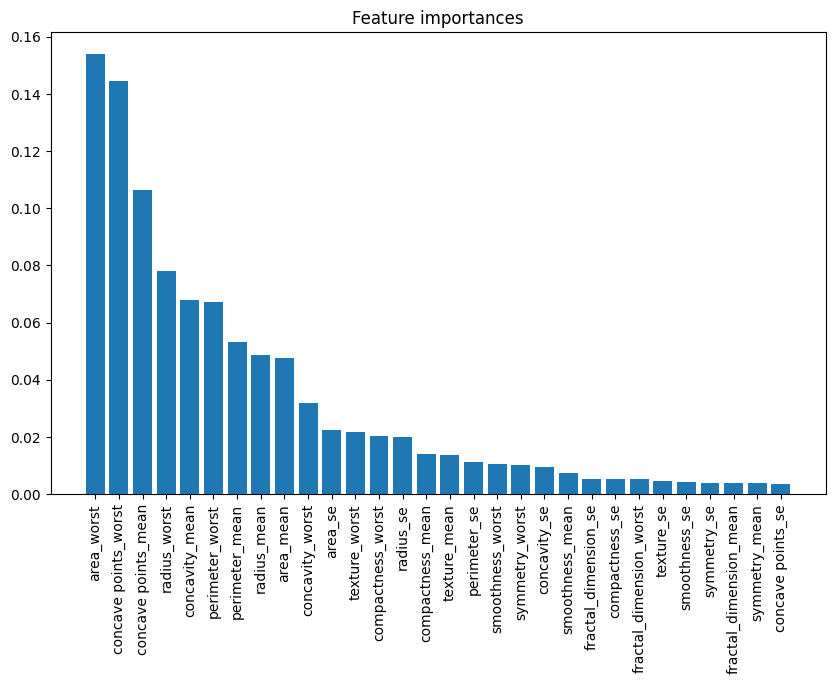

In [43]:
# Train a random forest classifier on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Extract feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
importance_sort_indices = np.argsort(importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[importance_sort_indices])
plt.xticks(range(X_train.shape[1]), df.columns[2:][importance_sort_indices], rotation=90)
plt.show()

Here, we trained a RandomForestClassifier. Random Forest Classifier fits a number of decision tree classifiers on various sub_samples of the dataset and uses averaging to improve the predictive accuracy and control over_fitting.

It has parameters liek n_estimators (the number of trees in the forest), criterion(“gini”, “entropy”, “log_loss”) and so on. the random_state parameter controls both the randomness of the bootstrapping of the samples used when building trees (bootstrap is another parameter which is True by default) and the sampling of the features to consider when looking for the best split at each node.

after fitting the model, we extract the importance of features and sort them in descending order and then we plot the result.

#deleting less important features

We want to delete some columns of the dataframe that seem less important according to the above correlation and random_forest results.So we select the features that are recognized less important in both of them, they are:

fractal_dimension_mean, texture_se, smoothness_se, symmetry_se ,and fractal_dimension_se

we delete these columns from the data set and do the spliting again.


In [44]:
X = df.drop(['id'], axis=1)

X_diagnosis_corr = X.corrwith(X.diagnosis)

corr_less_important_columns = X_diagnosis_corr[X_diagnosis_corr < 0.4].index
rfc_less_important_column = df.columns[2:][importance_sort_indices][-8:]

less_important_features = corr_less_important_columns.intersection(rfc_less_important_column)

df = df.drop(less_important_features, axis=1)
df = df.drop(['id'], axis=1)

In [45]:
X = df.drop(['diagnosis'], axis=1)

X_columns = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
df[X_columns] = X


# Split the data into training and testing sets

X = df.drop(['diagnosis'], axis=1)
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

df_train = X_train.assign(diagnosis=Y_train)
df_test = X_test.assign(diagnosis=Y_test)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.356147,...,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.156437,...,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.229622,...,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.139091,...,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.233822,...,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500


Here, we did the spliting and normalizing on data for the second time, after deleting less important features.

#Deleting the Outliers

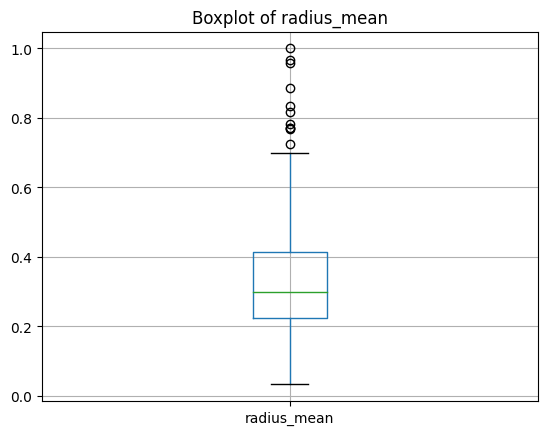

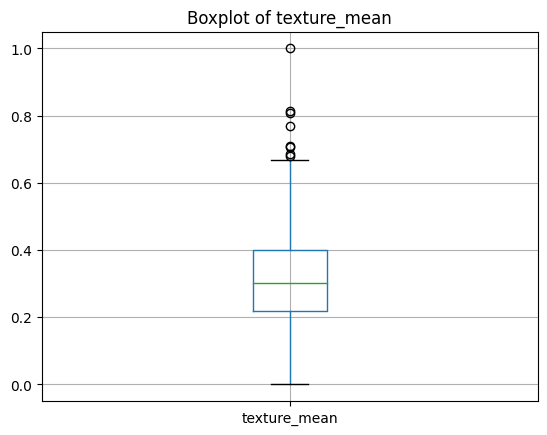

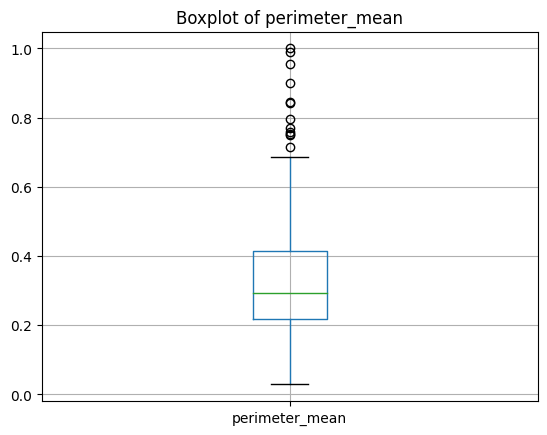

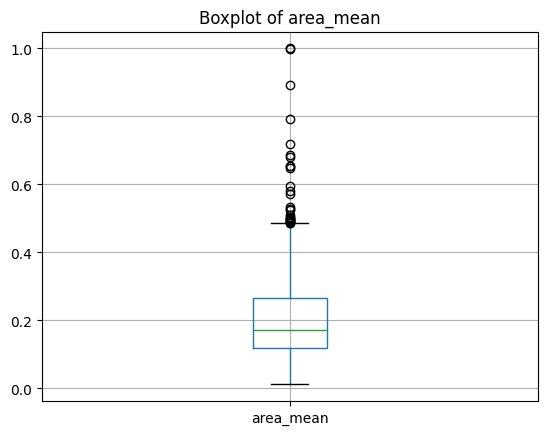

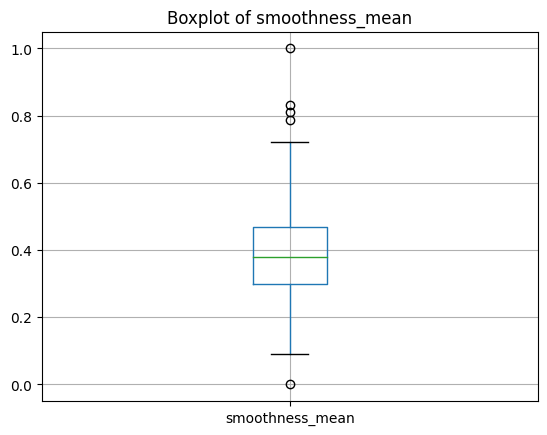

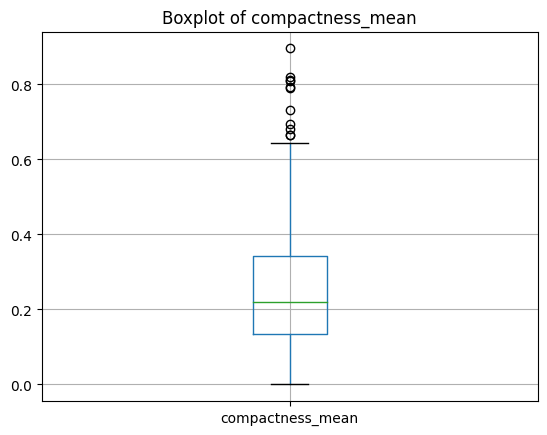

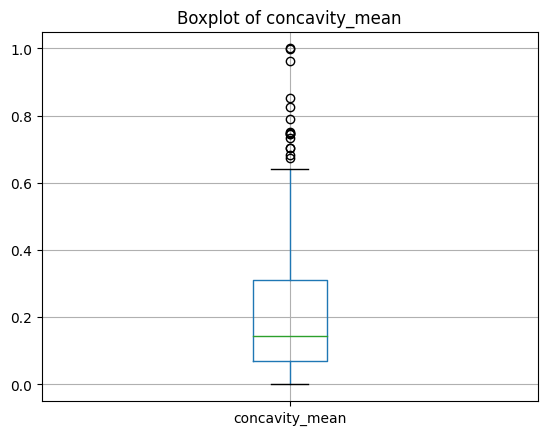

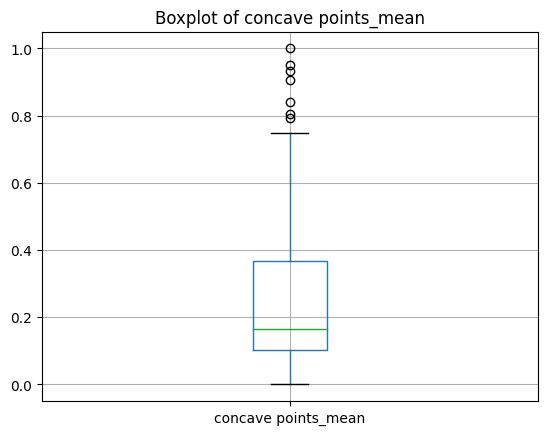

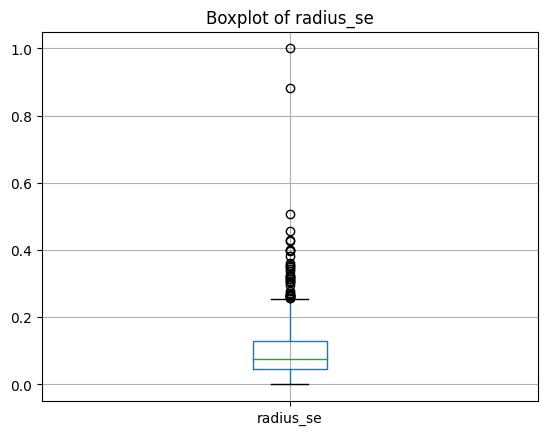

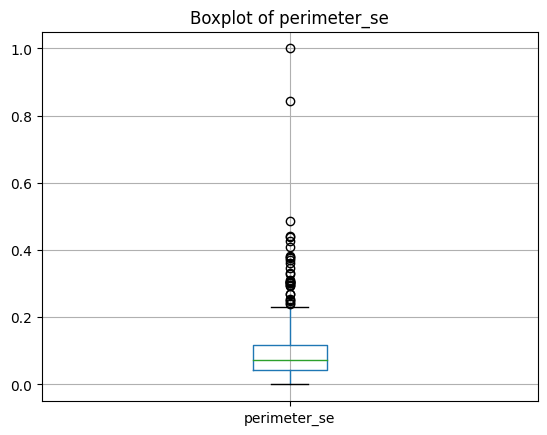

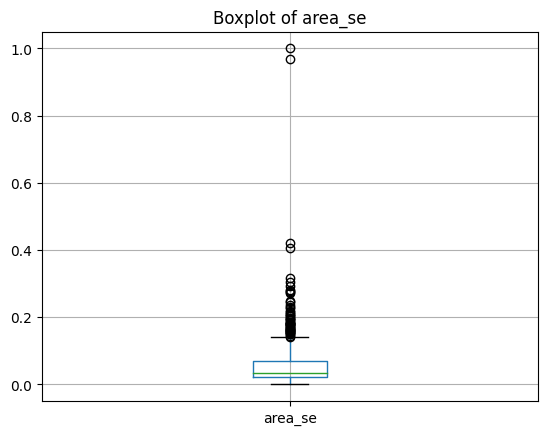

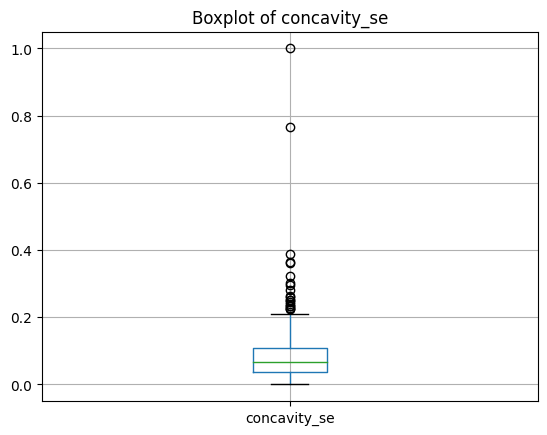

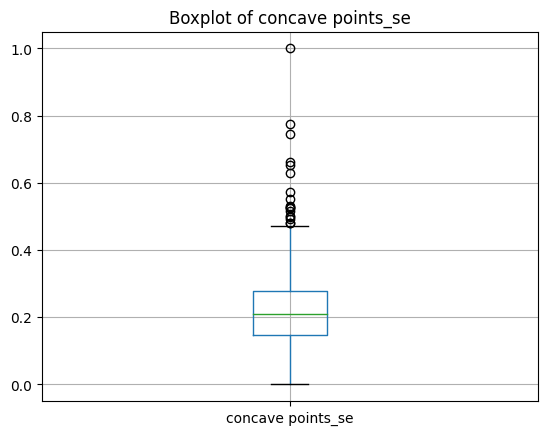

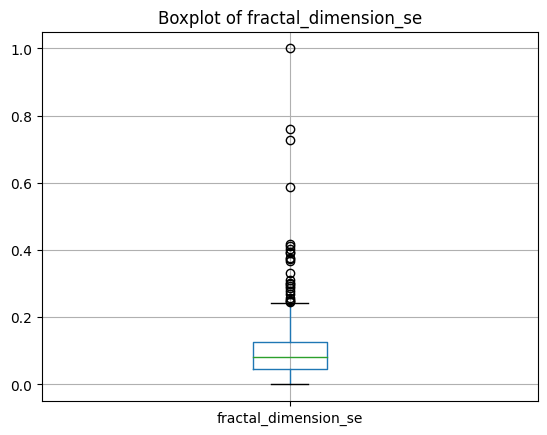

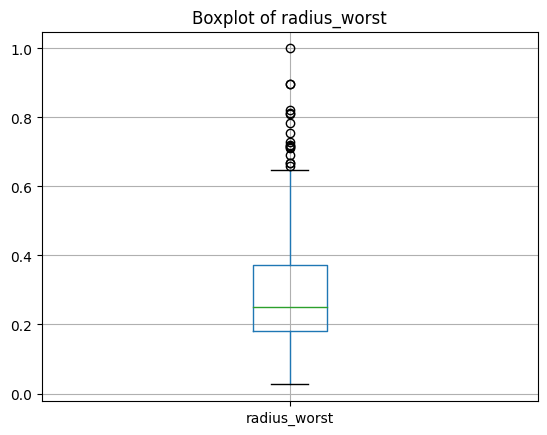

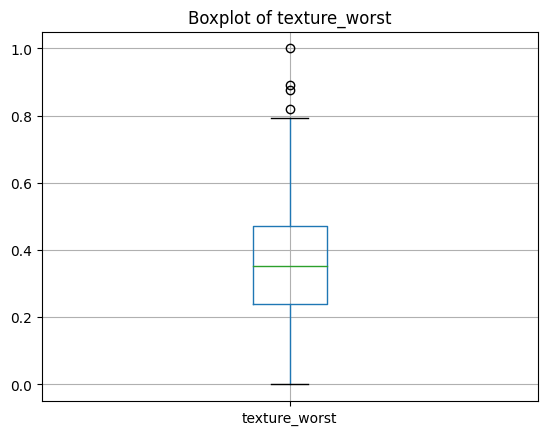

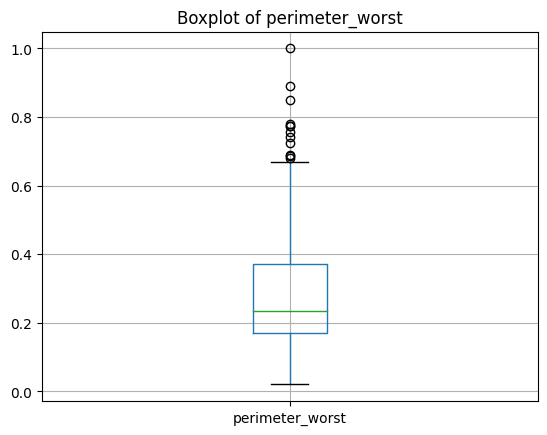

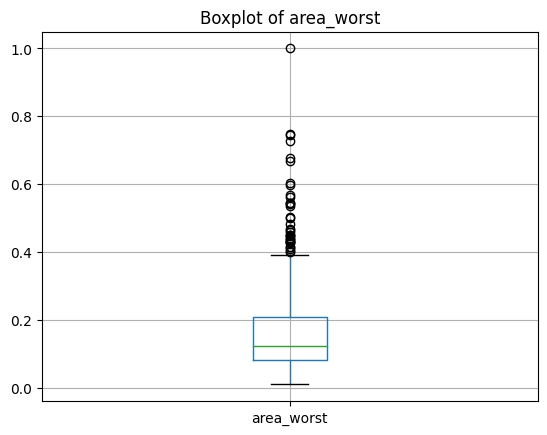

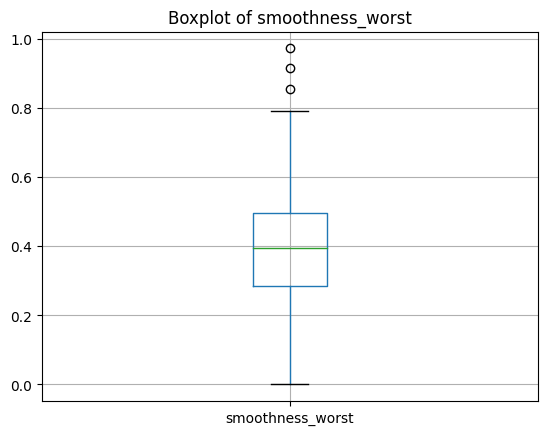

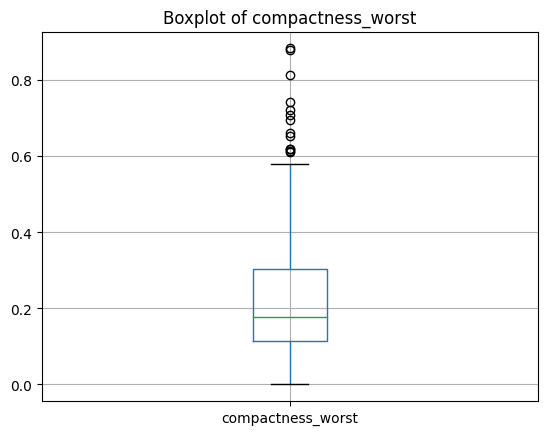

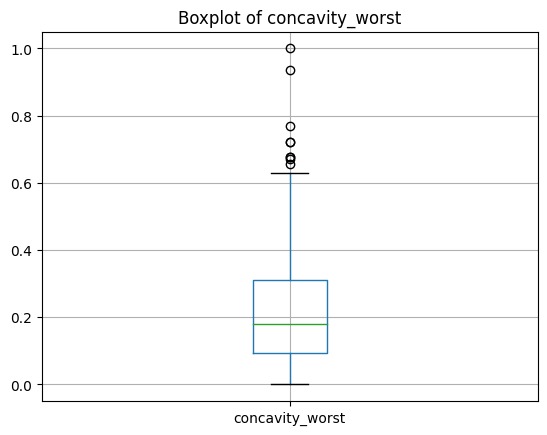

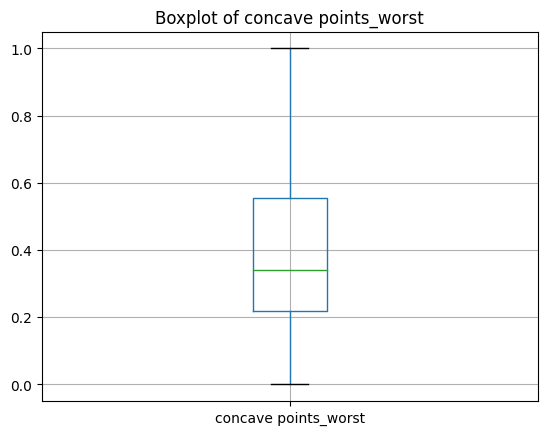

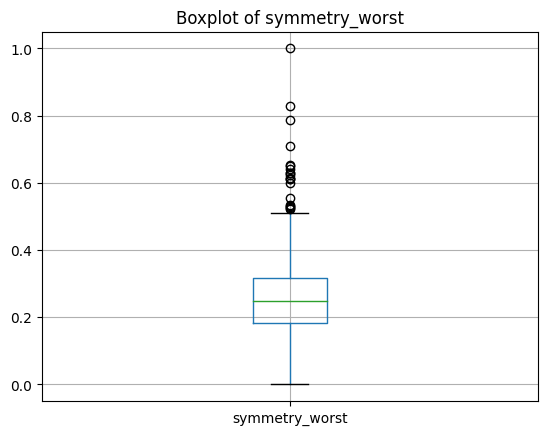

In [46]:
for column in df_train.columns:
    if column in ['diagnosis']:
        continue
    plt.figure()
    df_train.boxplot(column=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

here we draw boxplot to see distrubition of data. then we are going to remove outliers based on these graphs.

In [47]:
numeric_columns = df_train.columns[~df_train.columns.isin(['diagnosis', 'concave points_worst'])]

temp_mask_df = df_train.copy(deep=True)

for col in numeric_columns:
  lower_bound = temp_mask_df[col].quantile(0.001)
  upper_bound = temp_mask_df[col].quantile(0.999)
  temp_mask_df[col] = temp_mask_df[col].apply(lambda x: (x<lower_bound) or (x>upper_bound))


temp_mask_df = temp_mask_df[numeric_columns].any(axis=1)

df_train = df_train[~temp_mask_df]

Here, we remove ALL rows that have at least one outlier among their features.

we choose 0.001 and 0.999 quantile of data as lower and upper bounds for non-outlier rows.

because of small count of train dataset rows, we tried to drop small size of dataset as outliers.

#Building the MLP Model

In [48]:
X_train = df_train.drop(['diagnosis'], axis=1)
Y_train = df_train['diagnosis']
X_test = df_test.drop(['diagnosis'], axis=1)
Y_test = df_test['diagnosis']

here we split data for training models.

In [49]:
def build_model(epochs: int, learning_rate: float):
  # Define the MLP model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Compile the model
  model.compile(
      loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=['accuracy']
  )

  # Train the model
  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

  return model, history


here we define a function to build models based on different learning rates and number of epochs.

The function takes epoch and learning rate as arguments and then builds an MLP model using tensorflow.keras.models.sequential.

the model has 4 layers. the first layer which is the input layer has 32 nodes, that is a little more than the number of our input features, with 'relu' activation function which is a suitable activation function for hidden layers of perceptron. the second and the third layers have 16 and 32 nodes respectively. if we choose a big size (number of nodes ) for our MLP, then it may be like a big memory that gets over fit on training data. so it's usual to choose the size of layers between the size of input and the size of output.

it's also better to increase the depth of the MLP model so it can figure out more complex ralationships between our data; so we decide to have 2 hidden layers in this model.

The output layer has one node so the output of our model is one-dimentional. and it has the 'sigmoid' function as activation function, which is a good choice for classification models.

In [50]:
_models_info = list()

for epochs in [60, 300]:
  for learnin_rate in [0.0005, 0.005]:
    model, history = build_model(epochs, learnin_rate)
    print(f'building model for epochs: {epochs} AND learnin_rate: {learnin_rate}')
    _models_info.append(
        {
            'model': model,
            'history': history,
            'epochs': epochs,
            'learnin_rate': learnin_rate,
        }
    )

building model for epochs: 60 AND learnin_rate: 0.0005
building model for epochs: 60 AND learnin_rate: 0.005
building model for epochs: 300 AND learnin_rate: 0.0005
building model for epochs: 300 AND learnin_rate: 0.005


building models for different values of learning rates and number of epochs.

epoch is the number of times the model will be trained in forward and backward passes.

and learning rate determines the step size of updating the weights.

In [51]:
for i in _models_info:
  i['accuracy_test'] = i['model'].evaluate(X_test, Y_test, verbose=0)[1]
  i['accuracy_train'] = i['model'].evaluate(X_train, Y_train, verbose=0)[1]

In [52]:
for en, i in enumerate(_models_info):
  print(f"Model #{en}: accuracy on test: {i['accuracy_test']}  ,  accuracy on train: {i['accuracy_train']}")

Model #0: accuracy on test: 0.9736841917037964  ,  accuracy on train: 0.981566846370697
Model #1: accuracy on test: 0.9824561476707458  ,  accuracy on train: 0.9769585132598877
Model #2: accuracy on test: 0.9649122953414917  ,  accuracy on train: 0.9907833933830261
Model #3: accuracy on test: 0.9649122953414917  ,  accuracy on train: 0.9976958632469177


evaluate and compare 4 model with different hyperparameters.

In [53]:
best_model = _models_info[2]['model']

we choosed the best of them next.

In [54]:
# Define the confusion matrix
def draw_confusion_matrix(_confusion_matrix):
  # confusion_matrix = np.array([[11567, 868], [1540, 2306]])

  fig, ax = plt.subplots(figsize=(4, 3))
  # Create the heatmap
  sns.heatmap(_confusion_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)

  # Add labels and title
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')

  # Show the plot
  plt.show()

a function for draw an image-based confusion matrix.

In [55]:
def make_evaluations(y_true, y_predicted):
  _metric_funcs = [accuracy_score, precision_score, recall_score, f1_score]

  return '\n'.join([
      f"{_metric.__name__}: {round(_metric(y_true, y_predicted), 2)*100} %" for _metric in _metric_funcs
  ])

a function for calculate different types of metrics.

In [56]:
Y_model_predicted = (best_model.predict(X_test) >= 0.5).astype(int)

4/4 [==============================] - 0s 2ms/step


predict test data.

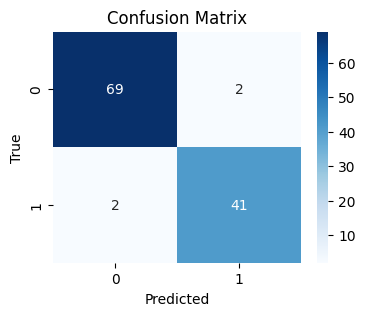

In [57]:
draw_confusion_matrix(confusion_matrix(Y_test, Y_model_predicted))

the confusion matrix, illustrating TP(right-down), FP(right-up), TN(left-up), and FN(left-down).

In [58]:
print(make_evaluations(Y_test, Y_model_predicted))

accuracy_score: 96.0 %
precision_score: 95.0 %
recall_score: 95.0 %
f1_score: 95.0 %


here is the confusion matrix of the best model of all. it shows that the model has a good performance and high scores, which means that it can be a reliable model in this subject of classification. one minor drawback of the model is it's recall_score which is a little less than expected(in the last run as i am writing); in such problems of diagnosing a disease like breast-cancer we prefer fo find all the probable suspects of having the disease, which means we don't want to lose any patient. so it's better to have the highest recall-score even if it has the consecuence of lower precision.

So we could fit the model again and this time, choose recall-score as metrics instead of accuracy, which we chose before.